In [31]:
import pandas as pd

## Series and DataFrame

In [32]:
series = pd.Series(["BMW", "Marcedes", "Ferrari"])
#Series -> 1-Dimensional
series

0         BMW
1    Marcedes
2     Ferrari
dtype: object

In [33]:
colors = pd.Series(["Black", "Silver", "Red"])
colors

0     Black
1    Silver
2       Red
dtype: object

In [34]:
#DataFrame -> 2-Dimensional
car_data = pd.DataFrame({"Brand": series, "Color": colors})
car_data

,Brand,Color
0,BMW,Black
1,Marcedes,Silver
2,Ferrari,Red


In [35]:
#import from source
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [36]:
#Export
car_sales.to_csv("exported_car_sales.csv", index=False) 
#if index=False is not set, index (0, 1, ..) will be considered as a seperate column in exported file
exported_car_sales = pd.read_csv("exported_car_sales.csv")
exported_car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


---

## Describe Data,

<p>Attribute vs Function is Attribute doesn't have parenthesis at the end but Function has</p>

In [37]:
#Attributes
car_sales.dtypes #shows the data types of columns

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [38]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [39]:
car_sales.index

RangeIndex(start=0, stop=10, step=1)

In [40]:
#Functions
car_sales.describe() #works only for numeric data

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [41]:
# Statistical Functions (mean, median, sum etc.)
car_sales.mean()

Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [42]:
car_sales["Doors"].sum() #only for Doors column

40

---

## Select and View

In [43]:
car_sales.head() #by default returns top 5 rows if no arguments are passed

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [44]:
car_sales.tail() #returns last 5 rows by default

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [45]:
animals = pd.Series(["Lion", "Tiger", "Cheetah", "Bear", "Crocodile", "Giraffe", "Horse"], index=[2,1,3,5,2,7,6])
animals

2         Lion
1        Tiger
3      Cheetah
5         Bear
2    Crocodile
7      Giraffe
6        Horse
dtype: object

In [46]:
animals.loc[2] #loc refers to index number

2         Lion
2    Crocodile
dtype: object

In [47]:
animals.loc[5]

'Bear'

In [48]:
car_sales.loc[4]

Make                Nissan
Colour               White
Odometer (KM)       213095
Doors                    4
Price            $3,500.00
Name: 4, dtype: object

In [49]:
animals.iloc[2] #iloc refers to position number

'Cheetah'

In [50]:
car_sales.loc[:3] #gives rows upto index 3. Same as head(4)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"


In [51]:
car_sales.iloc[:3] #gives 3 rows. Same as head(3)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"


In [52]:
car_sales[car_sales["Odometer (KM)"] > 100000 ]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [53]:
# compare two columns
pd.crosstab(car_sales["Make"], car_sales["Doors"])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [54]:
car_sales.groupby(["Make"]).mean()

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


In [55]:
#convert price to integer from object
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '').astype(int)

In [56]:
import matplotlib.pyplot as plt

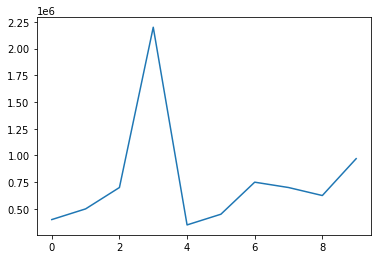

In [57]:
car_sales["Price"].plot()